# Problem 2

Using all three document preprocessors, tokenize the first 1000 documents and record the time. Make a plot showing the time taken for each. Using the average speed per document, estimate how much time it would take to preprocess the entire corpus and write the estimates in a sentence you submit. Describe the trade-offs you observe in the tokenizers’ accuracies and speed and which tokenizer you would use in practice.

In [ ]:
import time
import json
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from document_preprocessor import SplitTokenizer, RegexTokenizer, SpaCyTokenizer
import spacy

In [2]:
data_path = 'data/wikipedia_200k_dataset.jsonl.gz'

def load_documents(file_path, num_docs=1000):
    documents = []
    with gzip.open(file_path, 'rt', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= num_docs:
                break
            doc = json.loads(line)
            documents.append(doc)
    return documents

documents = load_documents(data_path, num_docs=1000)
print(f"Loaded {len(documents)} documents.")

Loaded 1000 documents.


In [3]:
mwe_path = 'data/multi_word_expressions.txt'

def load_multiword_expressions(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        expressions = [line.strip() for line in f if line.strip()]
    return expressions

multiword_expressions = load_multiword_expressions(mwe_path)
print(f"Loaded {len(multiword_expressions)} MWE.")

Loaded 1442 MWE.


In [4]:
split_tokenizer = SplitTokenizer(lowercase=True, multiword_expressions=multiword_expressions)
regex_tokenizer = RegexTokenizer(token_regex=r'\w+', lowercase=True, multiword_expressions=multiword_expressions)
spacy_tokenizer = SpaCyTokenizer(lowercase=True, multiword_expressions=multiword_expressions)

In [5]:
def tokenize_documents(tokenizer, documents, tokenizer_name):
    tokenized_docs = []
    start_time = time.time()
    for doc in tqdm(documents, desc=f"Tokenizing with {tokenizer_name}", unit="doc"):
        tokens = tokenizer.tokenize(doc['text'])
        tokenized_docs.append(tokens)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return tokenized_docs, elapsed_time

In [6]:
tokenizers = {
    'SplitTokenizer': split_tokenizer,
    'RegexTokenizer': regex_tokenizer,
    'SpaCyTokenizer': spacy_tokenizer
}

times = {}
tokenized_results = {}

for name, tokenizer in tokenizers.items():
    print(f"Using {name} to tokenize...")
    tokens, elapsed = tokenize_documents(tokenizer, documents, name)
    times[name] = elapsed
    tokenized_results[name] = tokens
    print(f"{name} duration: {elapsed:.2f} seconds.")

Tokenizing with SplitTokenizer:   0%|          | 2/1000 [00:00<00:57, 17.36doc/s]

Using SplitTokenizer to tokenize...


Tokenizing with RegexTokenizer:   0%|          | 2/1000 [00:00<00:53, 18.77doc/s]

SplitTokenizer duration: 11.52 seconds.
Using RegexTokenizer to tokenize...


Tokenizing with SpaCyTokenizer:   0%|          | 0/1000 [00:00<?, ?doc/s]

RegexTokenizer duration: 14.06 seconds.
Using SpaCyTokenizer to tokenize...


C:\Users\16979\AppData\Local\Programs\Python\Python312\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
Tokenizing with SpaCyTokenizer: 100%|██████████| 1000/1000 [17:36<00:00,  1.06s/doc]

SpaCyTokenizer duration: 1056.88 seconds.


C:\Users\16979\AppData\Local\Temp\ipykernel_103336\153951637.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=preprocessors, y=elapsed_times, palette="viridis")


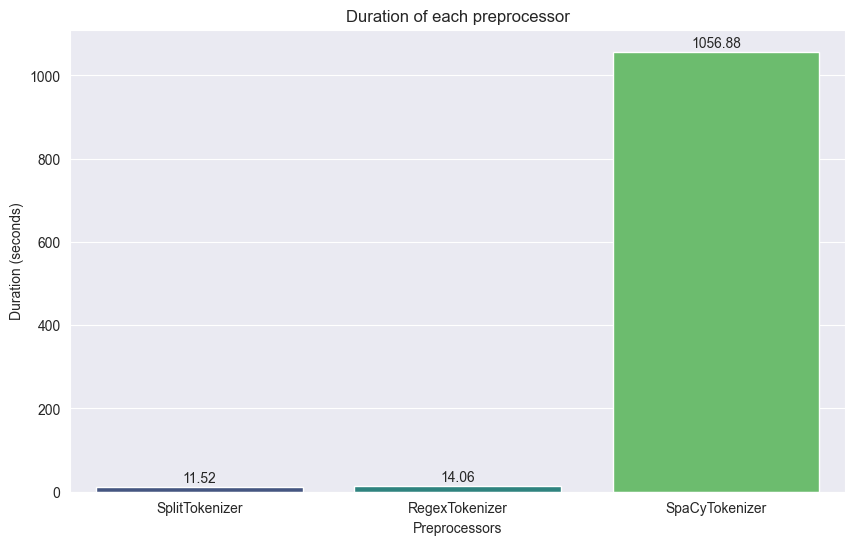

In [7]:
preprocessors = list(times.keys())
elapsed_times = list(times.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=preprocessors, y=elapsed_times, palette="viridis")
plt.xlabel('Preprocessors')
plt.ylabel('Duration (seconds)')
plt.title('Duration of each preprocessor')
for index, value in enumerate(elapsed_times):
    plt.text(index, value + max(elapsed_times)*0.01, f"{value:.2f}", ha='center')
plt.show()

In [8]:
total_docs = 200000
average_times = {name: elapsed / 1000 for name, elapsed in times.items()}
estimated_total_times = {name: avg_time * total_docs for name, avg_time in average_times.items()}
estimated_total_times_hours = {name: time_sec / 3600 for name, time_sec in estimated_total_times.items()}

for name in preprocessors:
    print(f"Estimate time for {name} to tokenize {total_docs} documents: {estimated_total_times_hours[name]:.2f} hours.")

Estimate time for SplitTokenizer to tokenize 200000 documents: 0.64 hours.
Estimate time for RegexTokenizer to tokenize 200000 documents: 0.78 hours.
Estimate time for SpaCyTokenizer to tokenize 200000 documents: 58.72 hours.


## Conclusion:

From the experiments above, we observe the following:

1. SplitTokenizer is the fastest, taking 11.52 seconds to process 1000 documents. It is estimated to take 0.64 hours to process the entire corpus of 200,000 documents. However, SplitTokenizer’s simplicity, relying solely on whitespace for tokenization, may result in lower accuracy when dealing with complex expressions and punctuation.

2. RegexTokenizer offers a moderate speed, taking 14.06 seconds to process 1000 documents, with an estimated time of 0.78 hours for the full corpus. It uses regular expressions, making it better at handling punctuation and special characters, thus providing improved accuracy compared to SplitTokenizer.

3. SpaCyTokenizer is the slowest, taking 1056.88 seconds to process 1000 documents, and would require an estimated 58.72 hours to tokenize 200,000 documents. However, SpaCyTokenizer excels in accuracy, handling more complex tokenization tasks and recognizing named entities (such as people and locations).

Which tokenizer to use:
1. In practical applications, the choice of tokenizer should be based on specific needs. If high tokenization accuracy is a priority and processing time is acceptable, SpaCyTokenizer is recommended. However, if processing time is the main concern and lower accuracy is acceptable, SplitTokenizer or RegexTokenizer would be more appropriate choices.
2. In this exercise, I will choose to use RegexTokenizer considering both time and accuracy.